In [1]:
from pysentimiento import create_analyzer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import matplotlib.gridspec as gridspec

/home/juancho/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'Could not load this library: /home/juancho/.local/lib/python3.10/site-packages/torchvision/image.so'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/juancho/.local/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect m

In [2]:
analyzer = create_analyzer(task="sentiment", lang="es")

config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [4]:
directorio = "../paginas_limpias"
archivos = os.listdir(directorio)
to_delete = ['politica_de_prevencion_de_la_corrupcion.txt', 'politica_de_prevencion_de_la_corrupcion_4.txt', 'politica_de_prevencion_de_la_corrupcion_8.txt']
for f in to_delete:
    if f in archivos:
        archivos.remove(f)
print(len(archivos))

8


In [5]:
paginas_dict = {}
paginas_dict["qui"] = '7'
paginas_dict["con"] = '4'
paginas_dict["el_"] = '6'
paginas_dict["pol"] = '9'
paginas_dict["fic"] = '2'
paginas_dict["cor"] = '3'
paginas_dict["por"] = '5'
paginas_dict["asa"] = '8'

emotions = ["joy", "sadness", "anger", "fear", "surprise", "disgust", "others"]

In [6]:
texts = {}
for f in archivos:
    with open(os.path.join(directorio, f), 'r', encoding='utf-8') as file:
        texts[f] = file.read()

In [7]:
results = {}
for text in texts:
    pred = analyzer.predict(texts[text])
    probas_redondeadas = {k: round(v, 2) for k, v in pred.probas.items()}
    results[paginas_dict[text[:3]]] = probas_redondeadas
    print(text)
    print(pred.output, probas_redondeadas)
    print("\n\n")

quito_honesto.txt
NEU {'NEG': 0.05, 'NEU': 0.73, 'POS': 0.22}



ficha_limpia_entre_la_hipocresia_y_una_sociedad_sobreadaptada_a_la_corrupcion_la_nacion.txt
NEU {'NEG': 0.26, 'NEU': 0.7, 'POS': 0.04}



el_descontrol_genera_ilegalidades_y_corrupcion_cuba_granma_organo_oficial_del_pcc.txt
NEU {'NEG': 0.48, 'NEU': 0.49, 'POS': 0.03}



politica_de_prevencion_de_la_corrupcion_2.txt
NEG {'NEG': 0.86, 'NEU': 0.12, 'POS': 0.02}



por_que_es_indispensable_romper_el_circulo_vicioso_de_la_corrupcion_aunque_sea_dificil_ifac.txt
NEU {'NEG': 0.22, 'NEU': 0.39, 'POS': 0.39}



controlar_la_corrupcion_no_es_opcional.txt
NEG {'NEG': 0.96, 'NEU': 0.03, 'POS': 0.0}



corrupcion.txt
NEU {'NEG': 0.09, 'NEU': 0.81, 'POS': 0.1}



asamblea_legislativa_de_el_salvador.txt
NEU {'NEG': 0.14, 'NEU': 0.82, 'POS': 0.04}





In [10]:
df = pd.DataFrame.from_dict(results, orient='index')
df.index = df.index.astype(int)
df.loc[1] = 0
df.loc[10] = 0
df = df.sort_index()
df = df*100
df

,NEG,NEU,POS
1,0.0,0.0,0.0
2,26.0,70.0,4.0
3,9.0,81.0,10.0
4,96.0,3.0,0.0
5,22.0,39.0,39.0
6,48.0,49.0,3.0
7,5.0,73.0,22.0
8,14.0,82.0,4.0
9,86.0,12.0,2.0
10,0.0,0.0,0.0


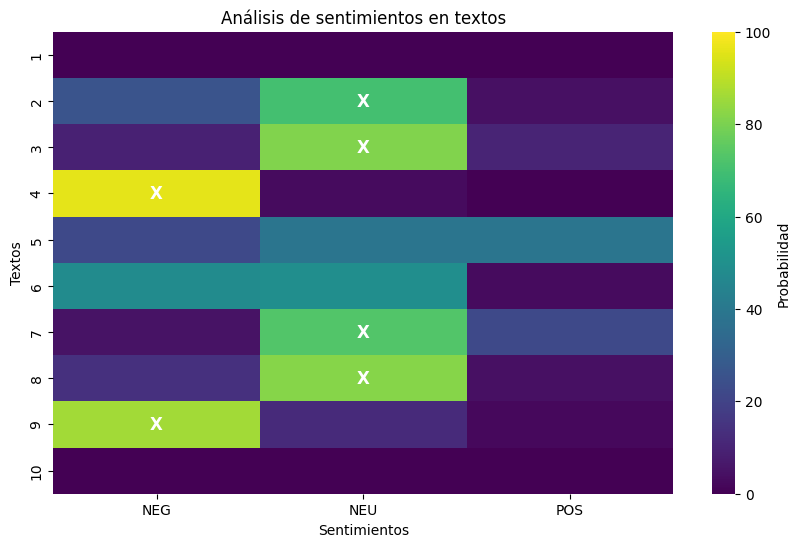

In [12]:
threshold = 60
annot_x = df.map(lambda x: "X" if x >= threshold else "")

plt.figure(figsize=(10, 6))

ax = sns.heatmap(df, 
                 annot=False,  
                 fmt="", 
                 cmap="viridis", 
                 cbar_kws={'label': 'Probabilidad'}, 
                 vmin=0, vmax=100
                )
plt.title("Análisis de sentimientos en textos")
plt.xlabel("Sentimientos")
plt.ylabel("Textos")

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if df.iloc[i, j] >= threshold:
            ax.text(j + 0.5, i + 0.5, "X", color='white', ha='center', va='center', fontsize=12, fontweight='bold')

plt.show()

In [ ]:
path_forms = "./anotaciones_corrupcion_modificado.csv"
df_forms = pd.read_csv(path_forms, header=0)

incisos_emociones = {"a)": "Alegría",
                    "b)": "Tristeza",
                    "c)": "Ira",
                    "d)": "Miedo",
                    "e)": "Sorpresa",
                    "f)": "Vergüenza",
                    "g)": "Culpa",
                    "h)": "Ninguna"
                    }

def extraer_incisos(cadena: str, unico=False):
    """
    Devuelve solo los incisos (a), b), ...) extraídos de la cadena.
    - unico=True: devuelve solo el primer inciso encontrado (o "")
    - unico=False: devuelve todos los incisos separados por espacio
    """
    if not isinstance(cadena, str):
        return ""
    # Busca incisos válidos (ajusta rango [a-i] según tu caso)
    encontrados = re.findall(r'([a-i]\))', cadena.lower())
    if unico:
        return encontrados[0] if encontrados else ""
    else:
        # quitar duplicados preservando orden
        vistos = set()
        unicos = [x for x in encontrados if not (x in vistos or vistos.add(x))]
        return " ".join(unicos)

df_forms.drop(columns=["Marca temporal", "Nombre", "Correo electrónico", "Tiempo aproximado (en minutos) que te tomo revisar el sitio web/texto y contestar todas las preguntas para este sitio web/texto específico:", "Algún comentario adicional que crees que es relevante indicar sobre la página web considerando las preguntas y la temática de corrupción (opcional):\n", "Algún comentario que quieras compartir sobre el cuestionario y la tarea de anotación que estás llevando a cabo (opcional):\n"], inplace=True)
df_forms.rename(columns={"Selecciona una de las 10 páginas a etiquetar": "pagina",
                    "1. Identifica el tipo de entidad que ha publicado el sitio web/texto:": "tipo_entidad",
                    "2. Origen de la entidad que publica el sitio web:": "origen_entidad",
                    '3. Identifica el principal propósito que tiene el contenido del sitio web:': "proposito",
                    '4. El  sitio web/texto principalmente presenta información de forma:': "informacion_presentada",
                    '5. Presenta una visión de la corrupción centrada en:': "vision",
                    '6. Respecto a las consecuencias de la corrupción el  sitio web/texto hace referencia a:': "consecuencias",
                    '7. El  sitio web/texto centra la atención en mostrar:': "que_muestra",
                    '8. Determine cuál es la intención del llamado general hacia el lector:': "intencion",
                    '9. Se presenta la corrupción como como un problema:': "localizacion_problema",
                    '10. Entes involucrados o descritos en el sitio web/texto son:': "involucrados",
                    '11. Respecto al estilo del sitio web/texto, seleccione el nivel de formalidad en el lenguaje:': "formalidad",
                    '12. Estime el nivel de educación necesario para comprender todo el sitio web/texto (o al que parece que se dirigirá el sitio web/texto):': "nivel_educacion",
                    '13. El tono general del sitio web/texto es:': "tono",
                    '14. Apela a alguna de las siguientes emociones:': "emociones"
                    }, inplace=True)

paginas = df_forms["pagina"].unique()
paginas_dict = {i: page[2:] for i, page in enumerate(paginas)}
paginas_dict[9] = paginas_dict[9][1:]

preguntas = df_forms.columns[1:]
multi_answer = ["proposito", "informacion_presentada", "consecuencias", "intencion", "localizacion_problema", "involucrados", "emociones"]

for p in preguntas:
    df_forms[p] = df_forms[p].apply(extraer_incisos, unico=(p not in multi_answer))

num = df_forms['pagina'].astype(str).str.extract(r'^\s*(\d+)')  # captura dígitos al inicio
df_forms['pagina'] = num.fillna(df_forms['pagina']).astype(str)
df_forms['pagina'] = pd.to_numeric(df_forms['pagina'], errors='coerce').astype('Int64')

def calcular_porcentajes(df, pregunta, orden_paginas, posibles_list=None):
    """Devuelve tabla porcentual (páginas × respuestas/incisos)."""
    if posibles_list is None:
        # respuesta única
        tabla = (df.groupby(["pagina", pregunta]).size().unstack(fill_value=0))
        tabla = tabla.reindex(orden_paginas, fill_value=0)
        return tabla.div(tabla.sum(axis=1).replace(0,1), axis=0) * 100
    else:
        # multi-respuesta (incisos separados por espacios)
        posibles_set = set(posibles_list)
        tmp = df[["pagina", pregunta]].copy()
        tmp[pregunta] = tmp[pregunta].fillna("").astype(str).str.strip().str.lower()
        tmp["inciso"] = tmp[pregunta].apply(
            lambda s: list(dict.fromkeys(t for t in s.split() if t in posibles_set))
        )
        den = tmp.groupby("pagina").size().reindex(orden_paginas, fill_value=0)
        expd = tmp.explode("inciso", ignore_index=True)
        expd = expd[expd["inciso"].notna() & (expd["inciso"] != "")]
        counts = expd.groupby(["pagina", "inciso"]).size().unstack(fill_value=0)
        counts = counts.reindex(orden_paginas, columns=posibles_list, fill_value=0)
        return counts.div(den.replace(0,1), axis=0) * 100
    
def conjuntos_activos(porcentajes: pd.DataFrame, umbral: float) -> dict:
    """
    Devuelve {pagina: set(incisos)} con incisos activos por página (>= umbral %).
    porcentajes: DataFrame (index=paginas, columns=incisos) con %.
    """
    activos = {}
    for pag, fila in porcentajes.iterrows():
        incisos = set(fila.index[fila.values >= umbral])
        activos[pag] = incisos
    return activos

def jaccard(act_forms: dict, act_llama: dict, paginas: list) -> pd.Series:
    vals = []
    idx  = []
    for pag in paginas:
        A = act_forms.get(pag, set())
        B = act_llama.get(pag, set())
        union = len(A | B)
        inter = len(A & B)
        score = inter / union if union > 0 else 1.0  # si ambos vacíos, los consideramos iguales (=1)
        vals.append(score); idx.append(pag)
    return pd.Series(vals, index=idx, name="jaccard")


/tmp/ipykernel_11115/280151244.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


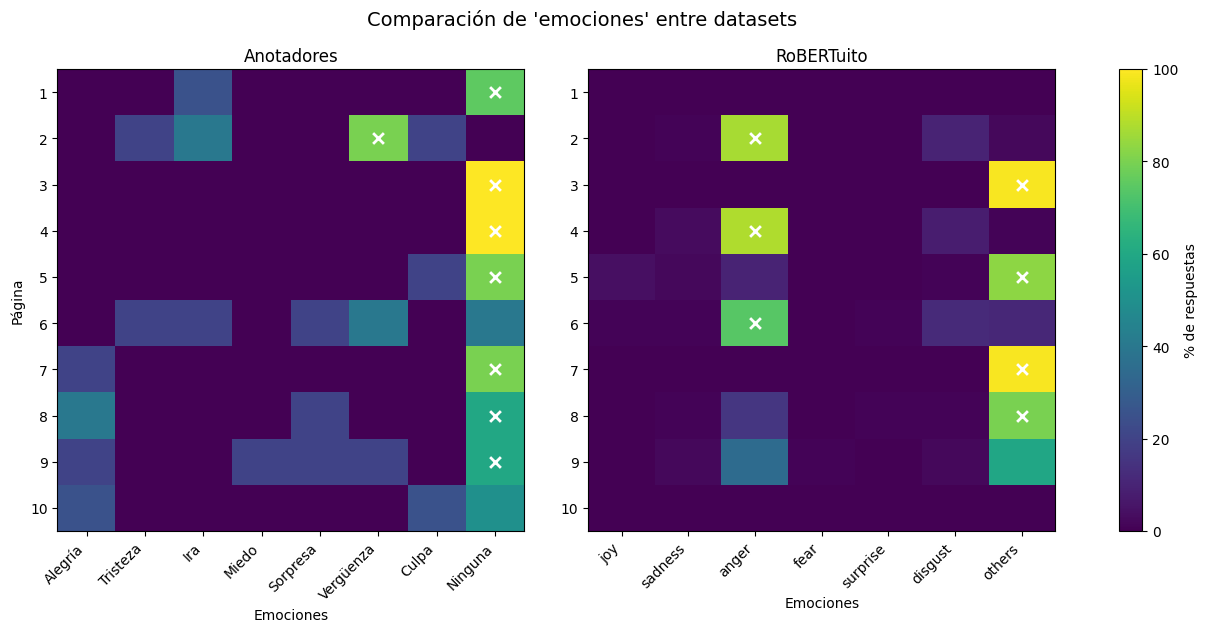

In [ ]:
porcentaje_concenso = 60

orden = {}
orden_paginas = list(range(1, 11))

posibles_list = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']

#out = Path("./graficas")
#out.mkdir(exist_ok=True)

# Paleta de colores global
inc = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)", "i)"]
colores = plt.cm.tab10.colors  # o 'tab20', 'Set3', etc.
color_map = {c: colores[i % len(colores)] for i, c in enumerate(inc)}

accuracies = []
jaccards = []

porcentajes_emociones = calcular_porcentajes(df_forms, "emociones", orden_paginas, posibles_list)

from matplotlib import gridspec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))

# 3 columnas: [heatmap_1][heatmap_2][colorbar]
gs = gridspec.GridSpec(
    1, 3,
    width_ratios=[1, 1, 0.05],  # la última columna es solo para la barra
    wspace=0.2
)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
cax = fig.add_subplot(gs[0, 2])  # barra de color vertical

# === Heatmap de anotadores ===
im1 = ax1.imshow(porcentajes_emociones.values, aspect='auto', vmin=0, vmax=100, cmap="viridis")
emociones_labels = [incisos_emociones.get(inc, inc) for inc in porcentajes_emociones.columns]
ax1.set_xticks(range(len(porcentajes_emociones.columns)))
ax1.set_xticklabels(emociones_labels, rotation=45, ha='right')
ax1.set_yticks(range(len(porcentajes_emociones.index)))
ax1.set_yticklabels(porcentajes_emociones.index)
ax1.set_title("Anotadores")
ax1.set_xlabel("Emociones")
ax1.set_ylabel("Página")

# === Marcar celdas con valor ≥ porcentaje_concenso ===
mask = porcentajes_emociones.values >= porcentaje_concenso
ys, xs = np.where(mask)
ax1.scatter(xs, ys, s=60, c='w', marker='x', linewidths=2)

# === Heatmap de modelo (por ejemplo, RoBERTuito) ===
im2 = ax2.imshow(df.values, aspect='auto', vmin=0, vmax=100, cmap="viridis")
ax2.set_xticks(range(len(df.columns)))
ax2.set_xticklabels(df.columns, rotation=45, ha='right')
ax2.set_yticks(range(len(df.index)))
ax2.set_yticklabels(df.index)
ax2.set_title("RoBERTuito")
ax2.set_xlabel("Emociones")
ax2.set_ylabel("")

mask = df.values >= porcentaje_concenso
ys, xs = np.where(mask)
ax2.scatter(xs, ys, s=60, c='w', marker='x', linewidths=2)

# === Barra de color vertical (compartida) ===
cb = fig.colorbar(im1, cax=cax, orientation="vertical")
cb.set_label("% de respuestas")

fig.suptitle("Comparación de 'emociones' entre datasets", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
